# Visualizing Class-Conditional Distributions $p(x|y)$ from LDA on MNIST
This notebook fits a Linear Discriminant Analysis model to the MNIST dataset, and visualizes the class-conditional mean vectors $\mu_y$ which approximate $p(x|y)$ assuming Gaussian class-conditional densities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Fit LDA model
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_scaled, y)

LinearDiscriminantAnalysis()

In [7]:
X_lda = lda.transform(X_scaled)

# Check the shape of transformed data
print("Original shape:", X_scaled.shape)
print("LDA-transformed shape:", X_lda.shape)

Original shape: (70000, 784)
LDA-transformed shape: (70000, 9)


In [4]:
# Get the class means approximating p(x|y)
class_means = lda.means_  # shape: (10, 784)

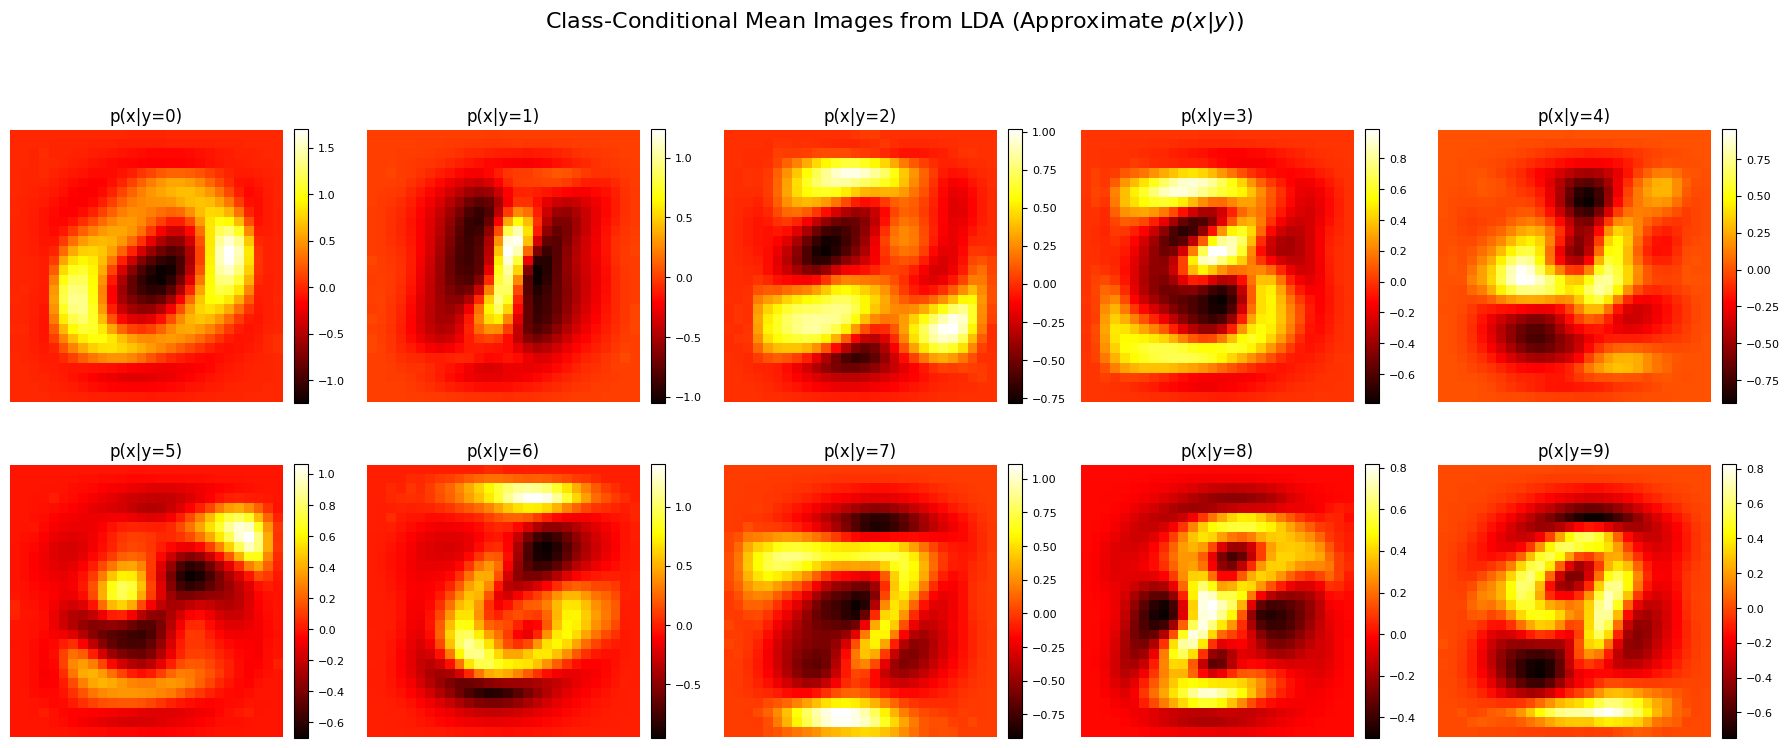

In [6]:
# Plot each class-conditional mean as a 28x28 heatmap with individual colorbars
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    mean_image = class_means[i].reshape(28, 28)
    im = ax.imshow(mean_image, cmap='hot', interpolation='nearest')
    ax.set_title(f'p(x|y={i})')
    ax.axis('off')

    # Create colorbar next to each image
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

plt.suptitle("Class-Conditional Mean Images from LDA (Approximate $p(x|y)$)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
